In [31]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [32]:
# Read in data jobs csv files
al = pd.read_csv("Indeed_job_results_Analytics_2019-01-09.csv")
bi = pd.read_csv("Indeed_job_results_Business_Intelligence_Analyst_2019-01-09.csv")
da = pd.read_csv("Indeed_job_results_Data_Analyst_2019-01-09.csv")
de = pd.read_csv("Indeed_job_results_Data_Engineer_2019-01-09.csv")
ds = pd.read_csv("Indeed_job_results_Data_Scientist_2019-01-09.csv")
st = pd.read_csv("Indeed_job_results_Statistician_2019-01-09.csv")

# Concatenate data job files into a single dataframe
data_jobs = pd.concat([al, bi, da, de, ds, st])

# Create a column for job categories and iterate through dataset to categorize each job title

data_jobs["Job Category"] = ""
for i, row in data_jobs.iterrows():
    if re.search("Analytics", row["Title"].title()) or re.search("Analytic", row["Title"].title()):
        row["Job Category"] = "Analytics"
    elif re.search("Data", row["Title"].title()) and re.search("Analyst", row["Title"].title()):
        row["Job Category"] = "Data Analyst"
    elif re.search("Data", row["Title"].title()) and re.search("Scientist", row["Title"].title()):
        row["Job Category"] = "Data Scientist"
    elif re.search("Data", row["Title"].title()) and re.search("Engineer", row["Title"].title()):
        row["Job Category"] = "Data Engineer"
    elif re.search("Business", row["Title"].title()) and re.search("Intelligence", row["Title"].title()):   
        row["Job Category"] = "Business Intelligence Analyst"
    elif re.search("Intern", row["Title"].title()) or re.search("Internship", row["Title"].title()):
        row["Job Category"] = "Internship"
    elif re.search("Business", row["Title"].title()) and re.search("Analyst", row["Title"].title()):   
        row["Job Category"] = "Business Analyst"
    elif re.search("Developer", row["Title"].title()):   
        row["Job Category"] = "Developer"
    elif "Statistician" in row["Title"].title():
        row["Job Category"] = "Statistician"
    elif re.search("Manager", row["Title"].title()) or \
    re.search("Director", row["Title"].title()) or \
    re.search("Dir", row["Title"].title()) or \
    re.search("Lead", row["Title"].title()) or \
    re.search("Head", row["Title"].title()):
        row["Job Category"] = "Management"
    elif re.search("Research", row["Title"].title()):
        row["Job Category"] = "Research"
    else:
        row["Job Category"] = "Other"

# Pare dataframe down to relevant columns and rename columns

# Split Regions, MSAs, and Locations into cities
data_jobs["City"] = ""
data_jobs["State"] = ""
data_jobs["Location"].value_counts()
data_jobs[["City", "State"]] = data_jobs["Location"].str.split(",", n=1, expand=True)
data_jobs["State"] = data_jobs["State"].str.strip()
data_jobs[["State", "ZIP"]] = data_jobs["State"].str.split(" ", n=1, expand=True)
data_jobs["ZIP"] = data_jobs["ZIP"].str.strip()
data_jobs[["ZIP", "Area"]] = data_jobs["ZIP"].str.split(" ", n=1, expand=True)

# Finalize clean jobs dataframes
# data_jobs

data_jobs_state = data_jobs.groupby(["State"])
data_jobs_df = pd.DataFrame({"Sum of Jobs" : data_jobs_state["Title"].count()})
data_jobs_state = data_jobs_df.sort_values("Sum of Jobs", ascending = False)
data_jobs_state = data_jobs_state.head(10)
data_jobs_state

,Sum of Jobs
State,
NJ,772
CA,708
NY,691
MA,379
PA,295
WA,293
VA,268
TX,208
GA,172


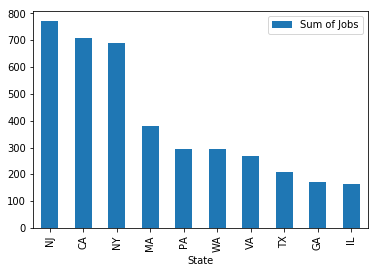

In [33]:
data_jobs_state.plot(kind = "bar")
plt.savefig("Top 10 states.png")

In [34]:
data_jobs_city = data_jobs.groupby(["City"])
data_jobs_df = pd.DataFrame({"Sum of Jobs" : data_jobs_city["Title"].count()})
data_jobs_city = data_jobs_df.sort_values("Sum of Jobs", ascending = False)
data_jobs_city = data_jobs_city.head(10)
data_jobs_city

,Sum of Jobs
City,
New York,549
San Francisco,203
Seattle,195
Boston,188
United States,183
Atlanta,130
Chicago,114
Philadelphia,94
Washington,75


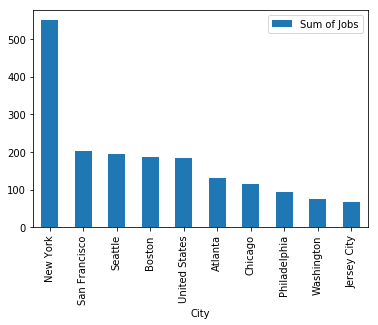

In [35]:
data_jobs_city.plot(kind = "bar")
plt.savefig("Top 10 cities.png")

In [36]:
# Read in rent csv file
rent = pd.read_csv("City_MedianRentalPrice_1Bedroom.csv")

# Pare the dataframe down to relevant columns and rename them if necessary
rent_columns = ["RegionName", "State", "Metro", "CountyName", "SizeRank", "2018-11"]
rent = rent[rent_columns]
rent.rename(columns = {"RegionName" : "City", "CountyName" : "County"}, inplace = True)

# Split Metro into city columns
rent["City1"] = ""
rent["City2"] = ""
rent["City3"] = ""
rent[["City1", "City2", "City3"]] = rent["Metro"].str.split("-", n=2, expand = True)

# Finalize clean rent file
rent_city = rent.groupby(["City", "State"]).agg({"2018-11" : "mean"})
rent_city = rent_city.sort_values("2018-11", ascending = True)
rent_city = rent_city.head(50)

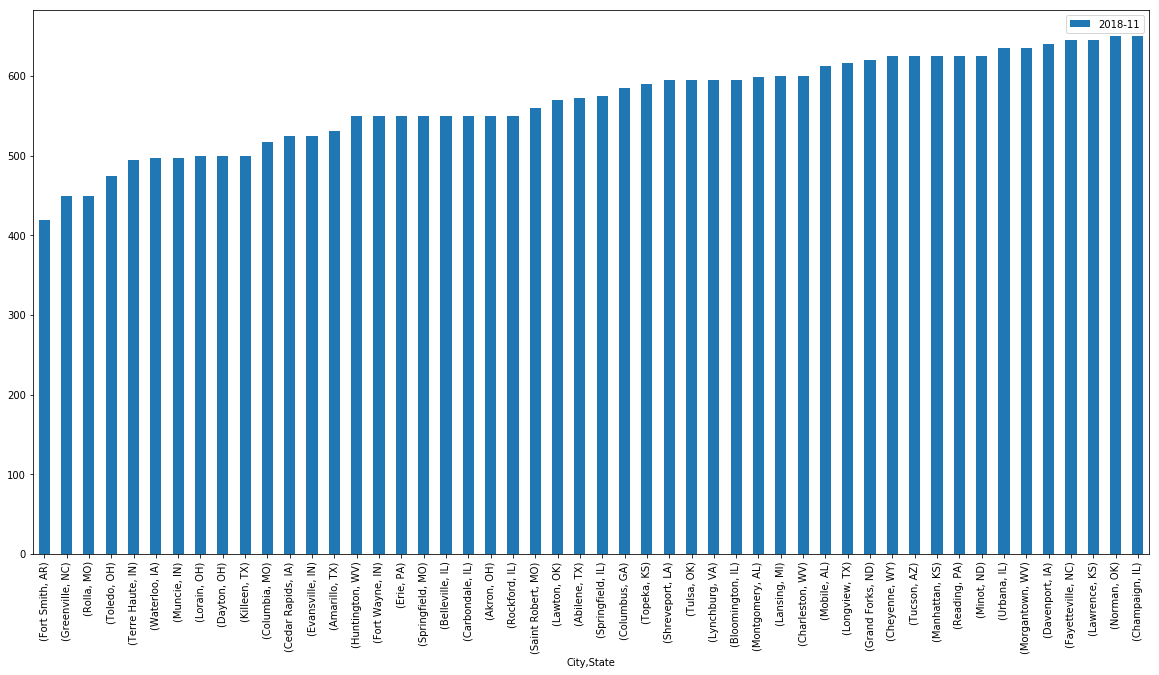

In [37]:
rent_city.plot(kind = "bar", figsize = (20,10))
plt.savefig("50 Low Rent Cities.png")

In [64]:
# Read in salary csv file
salary = pd.read_csv("MSA_M2017_dl.csv", low_memory = False)

# Pare the dataframe down to relevant columns and rename them if necessary
salary_columns = ["PRIM_STATE", "AREA_NAME", "City1", "City2", "City3", "State2", "OCC_TITLE", "TOT_EMP", "EMP_PRSE", "JOBS_1000", "H_MEDIAN", "A_MEDIAN"]
salary = salary[salary_columns]
salary.rename(columns = {"PRIM_STATE" : "State", 
                         "AREA_NAME" : "Area", 
                         "OCC_TITLE" : "Occupation", 
                         "TOT_EMP" : "Estimated Total Employment", 
                         "EMP_PRSE" : "Employment Percent RSE",
                         "JOBS_1000" : "Occupation per 1000", 
                         "H_MEDIAN" : "Hourly Median Wage", 
                         "A_MEDIAN" : "Annual Median Salary"}, inplace = True)
salary = salary.loc[salary["Occupation"] == "All Occupations"]

# Finalize clean salary file
salary_top = salary.groupby(["Area", "State"])
salary_top = pd.DataFrame({"Annual Median Salary" : salary_top["Annual Median Salary"].max()})
salary_top = salary_top.sort_values("Annual Median Salary", ascending = False)
salary_top = salary_top.head(20)
salary_top = salary_top.reset_index()

,Area,State,Annual Median Salary
0,California,MD,"62,820"
1,San Jose,CA,"57,540"
2,San Francisco,CA,"57,290"
3,Washington,DC,"54,300"
4,Boston,MA,"53,630"
5,Framingham,MA,"51,780"
6,Trenton,NJ,"51,440"
7,Seattle,WA,"50,550"
8,Silver Spring,MD,"49,690"
9,Bridgeport,CT,"49,630"


In [69]:
# salary_top.plot(kind = "bar")
# plt.savefig("20 High Salary Cities.png")